# 군집분석(Clustering)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import  matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris,load_breast_cancer, load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, mean_absolute_error, mean_squared_error
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline

In [3]:
# 여러 분류 지표 출력
def get_clf_eval(y_test,pred):
    cf = confusion_matrix(y_test,pred)
    acc = accuracy_score(y_test,pred)
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    print(cf)
    print('정확도 :{0:.4f}, 정밀도 :{1:.4f}, 재현율 :{2:.4f}, F1 :{3:.4f}'.format(acc,pre,rec,f1))
#     return [acc, pre, rec, f1]

# 다중 분류 지표 출력
def get_multiclf_eval(y_test,pred):
    cf = confusion_matrix(y_test,pred)
    acc = accuracy_score(y_test,pred)
    pre = precision_score(y_test,pred, average='micro')
    rec = recall_score(y_test,pred, average='macro')
    f1 = f1_score(y_test,pred, average='weighted')
    
    print(cf)
    print('정확도 :{0:.4f}, 정밀도 :{1:.4f}, 재현율 :{2:.4f}, F1 :{3:.4f}'.format(acc,pre,rec,f1))
#   return [acc, pre, rec, f1]

# roc curve
def roc_curve_plot(y_test, pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],linestyle='--', color='k', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

## 데이터 불러오기

In [150]:
customer_data = pd.read_csv('data/shopping-data.csv')
print('customer_data :',customer_data.shape)
customer_data.head()

customer_data : (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 계층적 군집분석

### 분리형 군집분석

In [151]:
data = customer_data.iloc[:,2:].values

linked = linkage(data, method='ward')

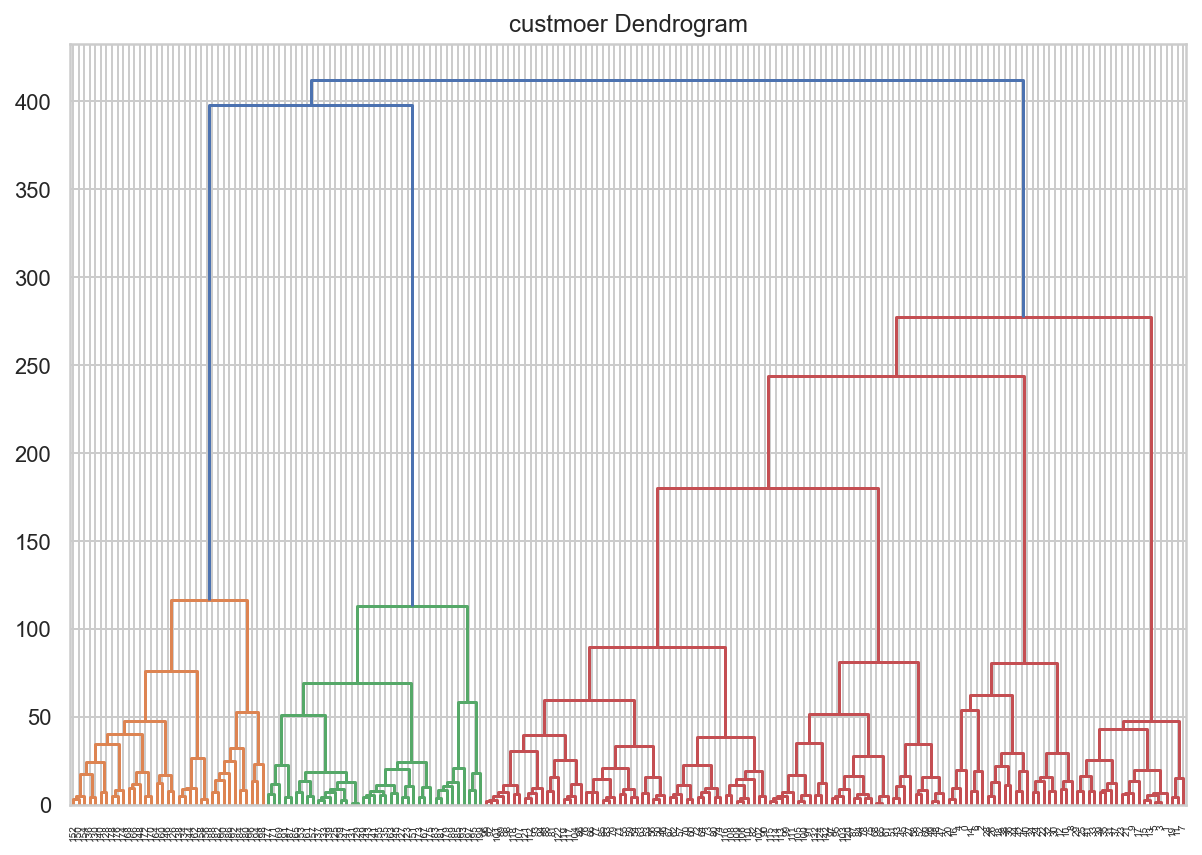

In [152]:
plt.figure(figsize=(10, 7))
plt.title('custmoer Dendrogram')
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### 합병형 군집분석

In [23]:
data = customer_data.iloc[:,2:].values

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data)

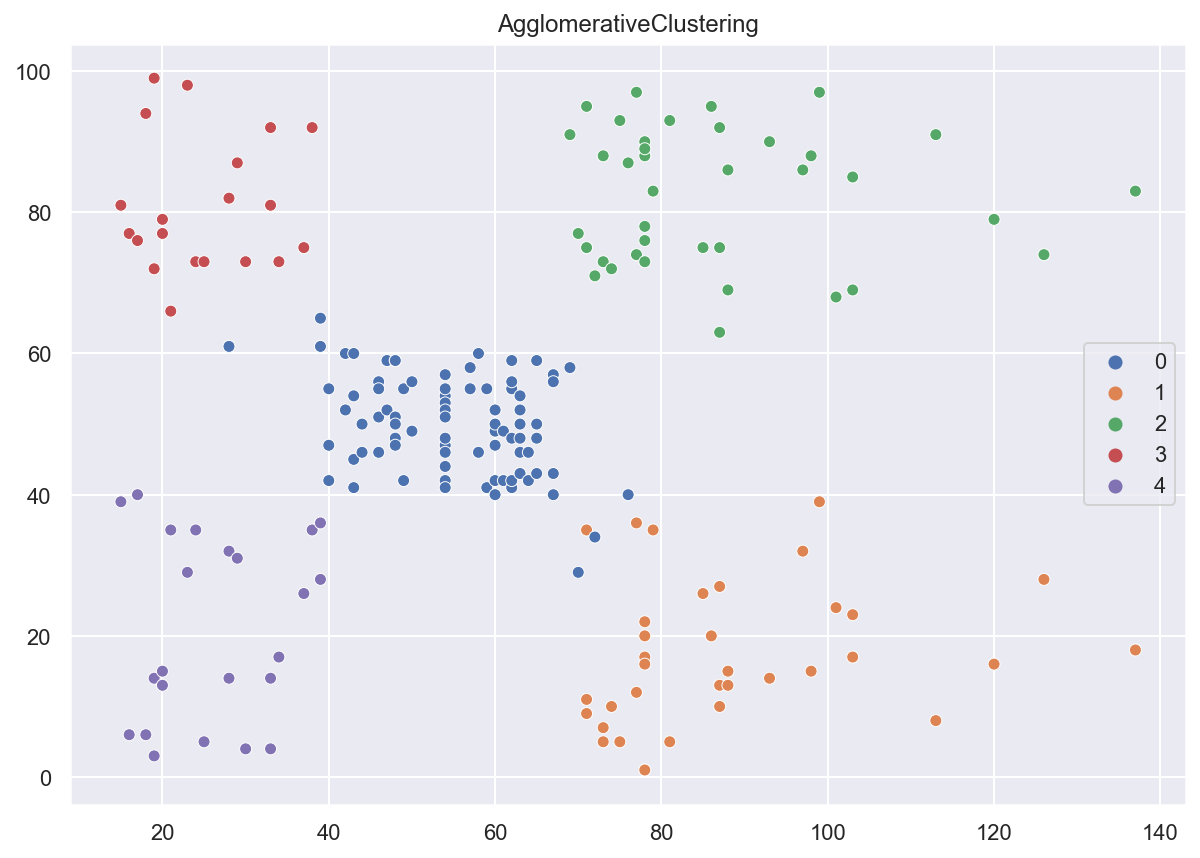

In [47]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
plt.title('AgglomerativeClustering')
sns.scatterplot(data[:,1], data[:,2], hue=labels, palette="deep")
plt.show()

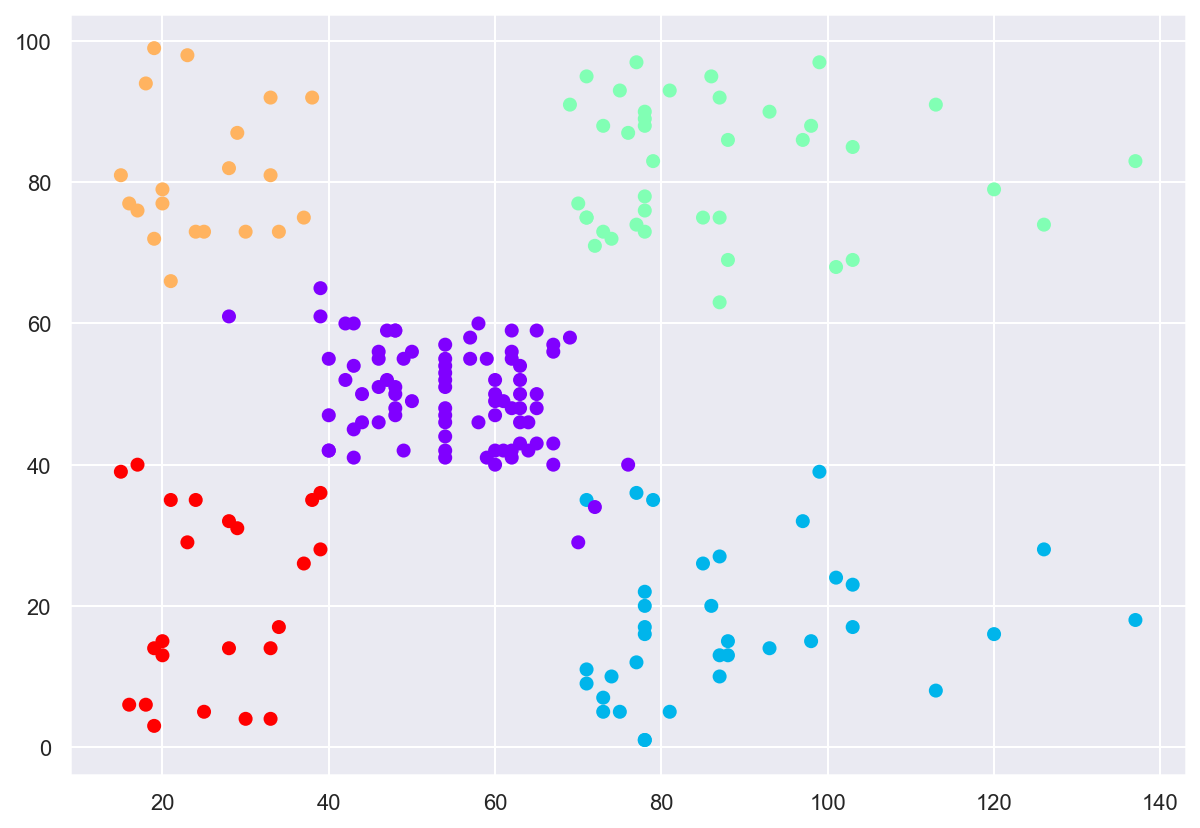

In [49]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,1], data[:,2], c=cluster.labels_, cmap='rainbow')
plt.show()

## 비계층적 군집분석

### KMeans Clustering

### 데이터 불러오기 및 전처리

In [50]:
# 데이터 불러오기
iris= load_iris()
iris_df = pd.DataFrame(iris.data, columns=[word[:12].strip() for word in iris.feature_names])
print('iris_df.shape :',iris_df.shape)
iris_df.head()

iris_df.shape : (150, 4)


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
# 표준화
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

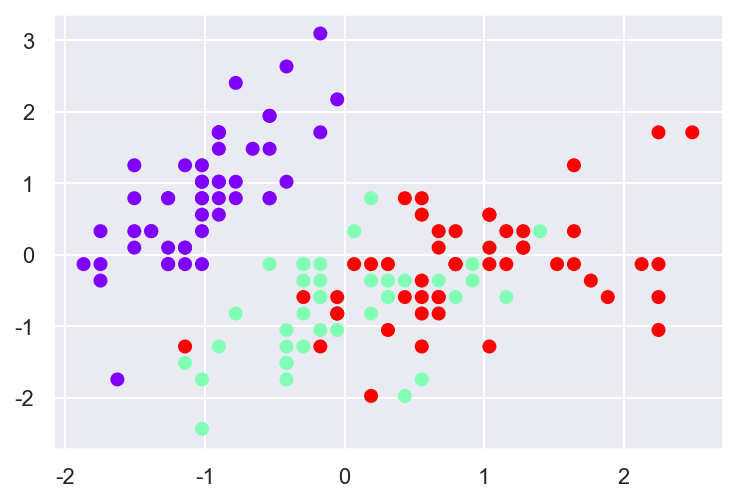

In [55]:
# Before EDA
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='rainbow')
plt.show()

In [68]:
# KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0, )
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [78]:
# KMeans Coef
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
kmeans.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
139.82049635974974


In [101]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_df['silhouette_coef'] = silhouette_samples(X_scaled,kmeans.labels_)
iris_df.head()

,sepal length,sepal width,petal length,petal width,target,cluster,pca_1,pca_2,silhouette_coef
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027,0.734195
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134,0.568274
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908,0.677547
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395,0.620502
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835,0.728474


In [71]:
iris_df.groupby(['target','cluster'])['sepal width'].count()

target  cluster
0       1          50
1       0          39
        2          11
2       0          14
        2          36
Name: sepal width, dtype: int64

In [73]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
pca_data[:4]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451]])

In [75]:
iris_df['pca_1'] = pca_data[:,0]
iris_df['pca_2'] = pca_data[:,1]
iris_df.head()

,sepal length,sepal width,petal length,petal width,target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


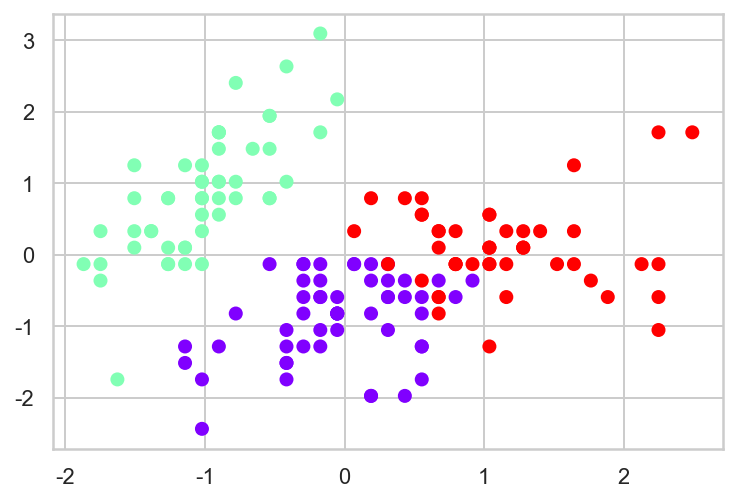

In [96]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=iris_df['cluster'], cmap='rainbow')
plt.show()

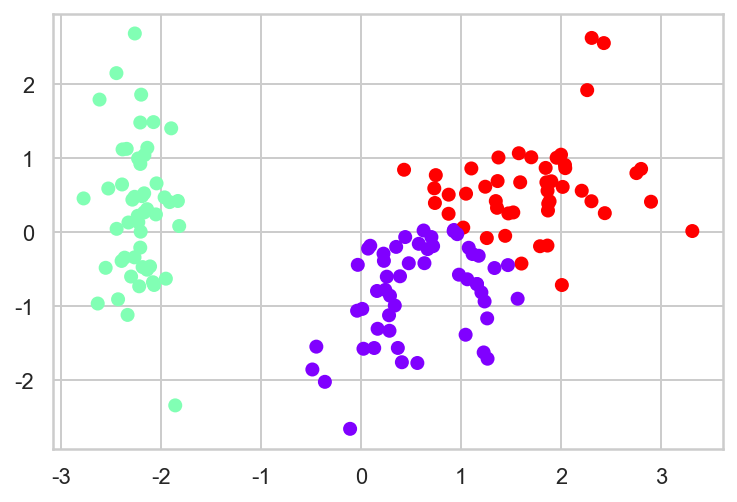

In [76]:
plt.scatter(iris_df['pca_1'], iris_df['pca_2'], c=iris_df['cluster'], cmap='rainbow')
plt.show()

### 실루엣 계수 계산 및 최적 클러스터 개수 구하기

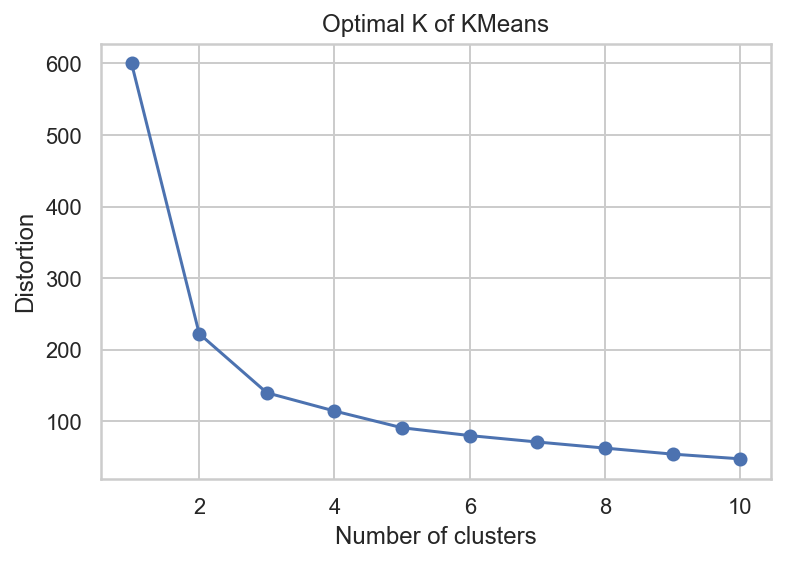

In [81]:
# 이니셔 기반 클러스터 개수 구하기
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_scaled)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

# plot - 급격하게 줄어드는 부분
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Optimal K of KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

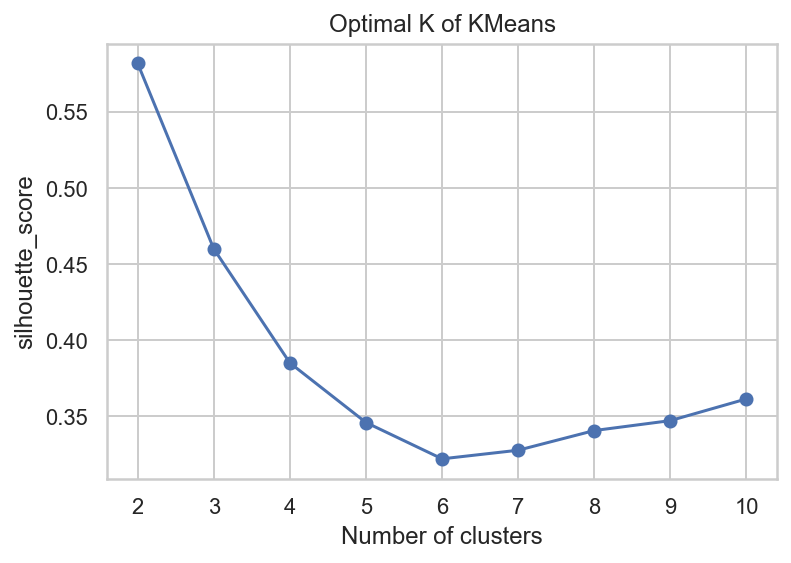

In [86]:
# 실루엣 기반 클러스터 개수 구하기
distortions = []
for i in range(2, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_scaled)
    distortions.append(silhouette_score(X_scaled,km.labels_))

# plot - 급격하게 줄어드는 부분
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Optimal K of KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

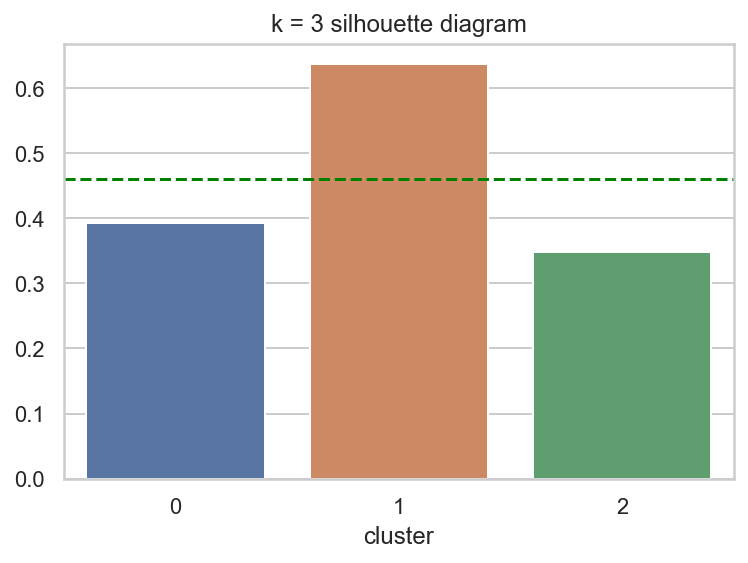

In [119]:
# 실루엣 다이어그램
sil_group = iris_df.groupby('cluster')['silhouette_coef'].mean()
sil_score = silhouette_score(X_scaled,kmeans.labels_)
sns.barplot(x = sil_group.index, y=sil_group.values)
plt.title('k = 3 silhouette diagram')
plt.axhline(sil_score, color='green', linestyle='--', label='median')
plt.show()

## 혼합 분포 군집(Mixture Distribution Clustering)

### 가우시안 혼합 모델 (Gaussian Mixture Model)

In [122]:
# 데이터 불러오기
iris= load_iris()
iris_df = pd.DataFrame(iris.data, columns=[word[:12].strip() for word in iris.feature_names])
iris_df['target'] = iris.target
print('iris_df.shape :',iris_df.shape)
iris_df.head()

iris_df.shape : (150, 5)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [123]:
# 표준화
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
gmm = GaussianMixture(n_components=3, random_state=42, n_init=10)
gmm.fit(X_scaled)

GaussianMixture(n_components=3, random_state=42)

In [125]:
gmm_cluster_labels = gmm.predict(X_scaled)
iris_df['gmm_cluster'] = gmm_cluster_labels
iris_df.head()

,sepal length,sepal width,petal length,petal width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [126]:
iris_df.groupby(['target','gmm_cluster'])['petal length'].count()

target  gmm_cluster
0       1              50
1       0               5
        2              45
2       0              50
Name: petal length, dtype: int64

### DBSCAN(Density Based Spatial Clustering of App with Noise)

In [4]:
# 데이터 불러오기
iris= load_iris()
iris_df = pd.DataFrame(iris.data, columns=[word[:12].strip() for word in iris.feature_names])
iris_df['target'] = iris.target
print('iris_df.shape :',iris_df.shape)
iris_df.head()

iris_df.shape : (150, 5)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# 표준화
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
dbscan = DBSCAN(eps = 0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_scaled)

In [7]:
iris_df['target'] = iris.target
iris_df['dbscan_cluster'] = dbscan_labels

In [8]:
iris_df.groupby(['target','dbscan_cluster'])['petal length'].count()

target  dbscan_cluster
0       -1                 5
         0                45
1       -1                10
         1                40
2       -1                17
         1                33
Name: petal length, dtype: int64

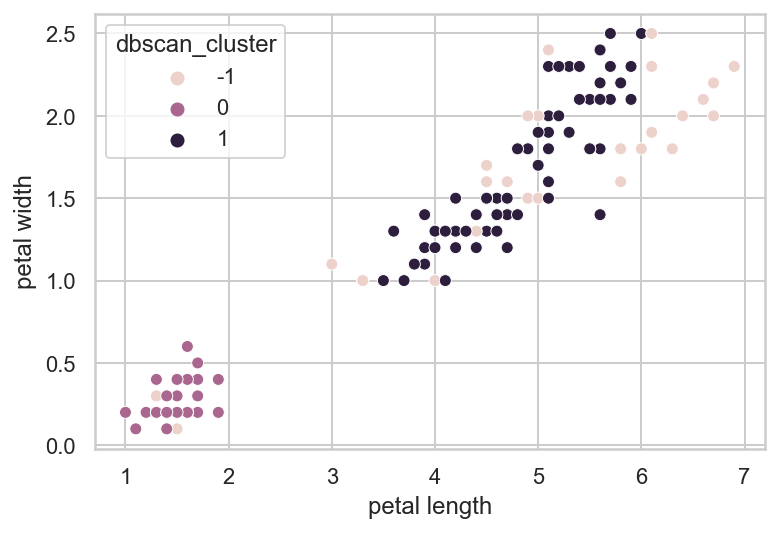

In [10]:
sns.scatterplot(data=iris_df, x='petal length', y='petal width',hue='dbscan_cluster')
plt.legend(labels = ['noise','cluster0','cluster1'])
plt.show()